# Experiment on Different Time-series Similarity Measures 0

## Preprocessing

In [1]:
# load image and libraries
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from itertools import groupby

def img_to_time_series(img_path, is_original):
    # load image
    input_image = plt.imread(img_path)
    # exhange x and y axis
    input_image = np.swapaxes(input_image, 0, 1)
    if is_original:
        # eliminate head and tail
        head_tail = range(int(input_image.shape[0] * 0.05), int(input_image.shape[0] * 0.95))
        input_image = input_image[head_tail, :]
    # get averge
    ave_image = np.mean(input_image, axis=2)
    # get border and eliminate zeros
    if not is_original:
        time_series = np.trim_zeros([np.argmin(x) for x in ave_image])
    else:
        time_series = [np.argmax(x) for x in ave_image]
    # rescale btw [0, 1]
    time_series = 1 - time_series / np.max(time_series)
    time_series /= np.max(time_series)

    if is_original:
    # get extraction range
        red_value = (243/255, 192/255, 192/255)
        ext_list = [np.argmin(np.abs(x[:,:3]-red_value)) for x in input_image]
        # getting Consecutive elements
        num_times, occurrence = max((sum(1 for _ in values), key) for key, values in groupby(ext_list))
        ind0 = ext_list.index(occurrence)
        ext_range = [ind0, ind0+num_times]
        # print(ext_range)
    else:
        ext_range = []

    # plot for verification
    if is_original:
        # Visualize binary image
        # original image
        plt.figure()
        plt.imshow(plt.imread(img_path))
        # loaded time-series
        plt.figure()
        plt.xlabel('x (pixels)',size=20)
        plt.ylabel('y (pixels)',size=20)
        plt.plot(time_series)
        plt.plot(ext_range, [0.5, 0.5], marker='*', ls='none')
    return time_series, ext_range


qdraw-has.png
qdraw-sp.png
qdraw-fp.png
qdraw-rb.png
qdraw-sd.png
qdraw-sr.png
qdraw-cwh.png
qdraw-hasb.png
qdraw-ihas.png
['has', 'sp', 'fp', 'rb', 'sd', 'sr', 'cwh', 'hasb', 'ihas']
Current file:  qst-hasb-072.png
Current file:  qst-hasb-066.png
Current file:  qst-hasb-099.png
Current file:  qst-has-037.png
Current file:  qst-has-023.png
Current file:  qst-has-143.png
Current file:  qst-hasb-106.png
Current file:  qst-hasb-113.png
Current file:  qst-has-142.png
Current file:  qst-has-022.png
Current file:  qst-has-036.png
Current file:  qst-hasb-098.png
Current file:  qst-hasb-067.png
Current file:  qst-hasb-073.png
Current file:  qst-hasb-065.png
Current file:  qst-hasb-059.png
Current file:  qst-has-020.png
Current file:  qst-has-034.png
Current file:  qst-has-008.png
Current file:  qst-has-140.png
Current file:  qst-hasb-111.png
Current file:  qst-hasb-105.png
Current file:  qst-hasb-139.png
Current file:  qst-hasb-104.png
Current file:  qst-hasb-110.png
Current file:  qst-has-141

/Users/haotiansun/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Current file:  qst-sp-072.png
Current file:  qst-sp-066.png
Current file:  qst-sp-099.png
Current file:  qst-sp-106.png
Current file:  qst-sp-113.png
Current file:  qst-sp-107.png
Current file:  qst-sp-098.png
Current file:  qst-sp-067.png
Current file:  qst-sp-073.png
Current file:  qst-sp-077.png
Current file:  qst-sp-063.png
Current file:  qst-sp-088.png
Current file:  qst-sp-117.png
Current file:  qst-sp-116.png
Current file:  qst-sp-102.png
Current file:  qst-sp-089.png
Current file:  qst-sp-062.png
Current file:  qst-sp-076.png
Current file:  qst-sp-048.png
Current file:  qst-sp-060.png
Current file:  qst-sp-074.png
Current file:  qst-sp-128.png
Current file:  qst-sp-114.png
Current file:  qst-sp-100.png
Current file:  qst-sp-101.png
Current file:  qst-sp-115.png
Current file:  qst-sp-129.png
Current file:  qst-sp-061.png
Current file:  qst-sp-049.png
Current file:  qst-sp-006.png
Current file:  qst-sp-012.png
Current file:  qst-sp-013.png
Current file:  qst-sp-007.png
Current fi

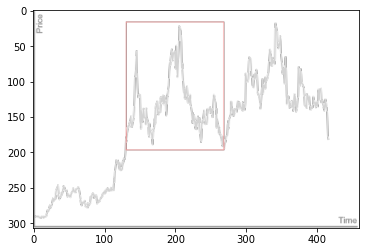

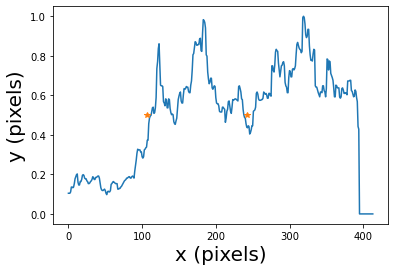

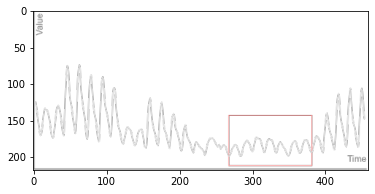

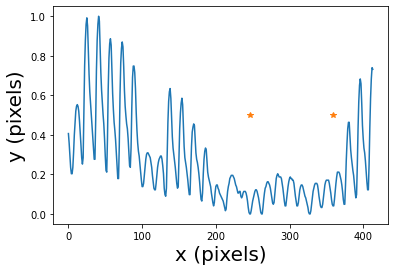

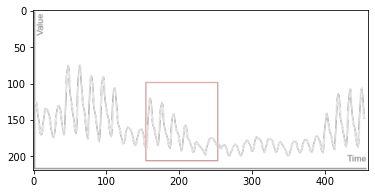

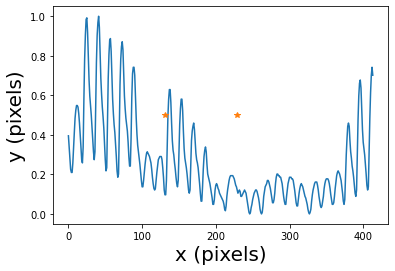

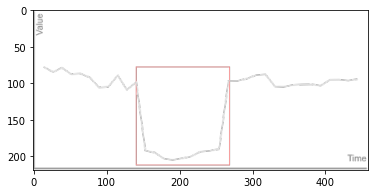

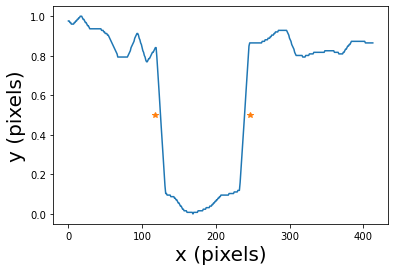

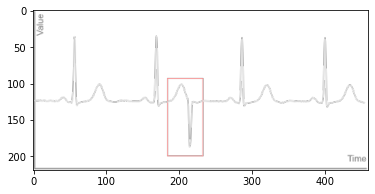

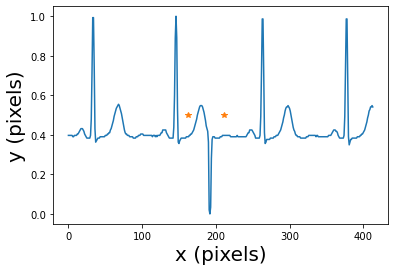

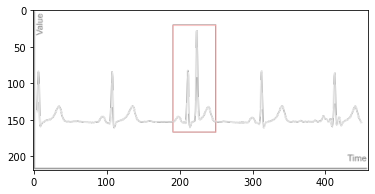

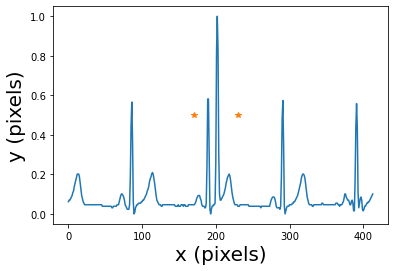

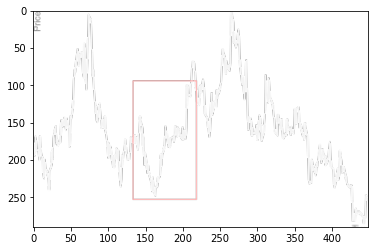

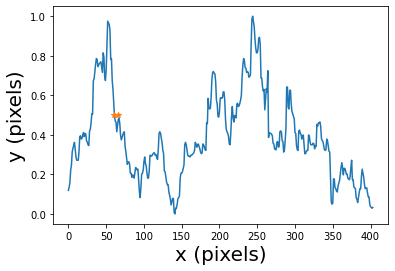

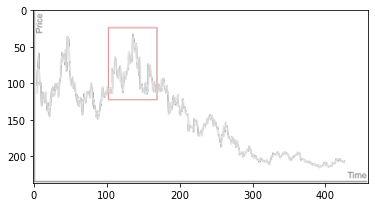

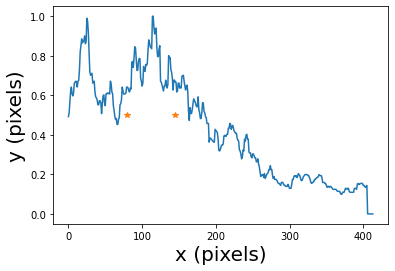

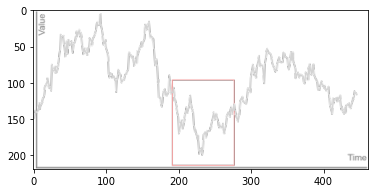

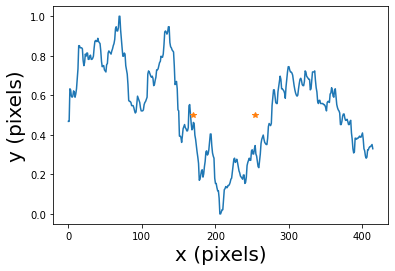

In [4]:
import os
 
root_path = './pngs/original_data/'
# to store files in a list
dataset_names = []
# dirs=directories
for (root, dirs, file) in os.walk(root_path):
    for f in file:
        if '.png' in f:
            print(f)
            dataset_names.append(f.removeprefix('qdraw-').removesuffix('.png'))
print(dataset_names)

for dataset_name in dataset_names:
    img_path = root_path + 'qdraw-' + dataset_name + '.png'
    time_series, ext_range = img_to_time_series(img_path, True)
    # save time-series
    np.save('./processed_datasets/' + 'original_' + dataset_name + '_X' + '.npy', time_series)
    np.save('./processed_datasets/' + 'original_' + dataset_name + '_y' + '.npy', ext_range)


root_path = './pngs/'
for dataset_name in dataset_names:
    data_mat = []
    for (root, dirs, file) in os.walk(root_path):
        for f in file:
            if 'qst-'+dataset_name in f:
                print('Current file: ', f)
                img_path = root_path + f
                time_series, _ = img_to_time_series(img_path, False)
                data_mat.append(time_series)
        # save time-series
    np.save('./processed_datasets/' + 'sketch_' + dataset_name + '.npy', data_mat)